In [40]:

#image preprocessing and plotting
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
from cv2 import imread, imshow, IMREAD_GRAYSCALE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#<3 always dependencies
import numpy as np
import pandas as pd

from keras.models import load_model

model = load_model('78%-2-Balanced.h5')

### Load Class Labels

In [41]:
#load data for class label references
train_directory = '../text-recognition/2_train_balanced'

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_directory,
        color_mode = 'grayscale',
        target_size=(64, 64),
        class_mode = 'categorical', 
        #classes = labels_list, 
        batch_size= 39290)
        
class_dictionary = train_generator.class_indices
labels = {v: k for k, v in class_dictionary.items()}
labels_list = [words for words in labels.values()]
labels_list

Found 19183 images belonging to 78 classes.


['I',
 'a',
 'about',
 'all',
 'an',
 'and',
 'are',
 'as',
 'at',
 'be',
 'been',
 'being',
 'but',
 'by',
 'can',
 'could',
 'first',
 'for',
 'from',
 'had',
 'has',
 'have',
 'he',
 'her',
 'him',
 'his',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'like',
 'made',
 'man',
 'may',
 'me',
 'more',
 'much',
 'new',
 'no',
 'not',
 'of',
 'on',
 'one',
 'only',
 'or',
 'other',
 'out',
 'over',
 'said',
 'she',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'there',
 'they',
 'this',
 'time',
 'to',
 'two',
 'up',
 'very',
 'was',
 'we',
 'were',
 'what',
 'when',
 'which',
 'who',
 'will',
 'with',
 'would',
 'you']

### Predict Function Dependencies 

In [42]:
def shape_new_img(image_path):
    
    """ image_path = image file path
        function takes in image path, converts to grayscale, 
        and reshapes to 4 dimensional array size to be compatible with ConvNet Model
    """
    desired_size = 64
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img, (desired_size, desired_size))
    finalarray = new_img_array.reshape(1, desired_size, desired_size, 1)
    
    return finalarray


In [ ]:
def predict_and_plot(word_path):
    """ 
    Takes path to a word, reshapes, makes prediction. Returns predicted class label, and a plot of the input image.
    """
    word = word_path
    reshaped_word = shape_new_img(word)
    pred = model.predict(reshaped_word)
    get_class = np.argmax(pred)
    prediction = labels_list[get_class]
     #plot input image
    img = cv2.imread(word_path,  cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap=plt.cm.gray)
    
    return prediction

## Image Recognition for Handwritten Text Words!

  
   


In [104]:
word = '../text-recognition/out_of_data_samples/Science Fair/fangfang-being-1.JPG'

'being'

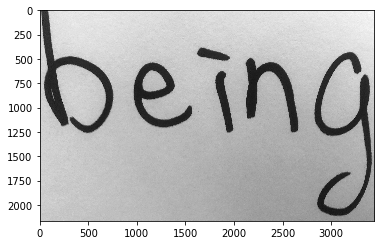

In [105]:
predict_and_plot(word)